## **Environment Setup**
Run all when initiating session

In [ ]:
# retrieve config file, if using colab (nothing should happen if you use Windows)
!cp './drive/My Drive/Live Workspace/generative-facial-cosmetics/model_engineering/config.py' '.'
!mkdir data
!cp -a './drive/My Drive/Live Workspace/generative-facial-cosmetics/model_engineering/data/' '.'
!mkdir models
!cp -a './drive/My Drive/Live Workspace/generative-facial-cosmetics/model_engineering/models/' '.'
!mkdir technical
!cp -a './drive/My Drive/Live Workspace/generative-facial-cosmetics/model_engineering/technical/' '.'
!mkdir trainers
!cp -a './drive/My Drive/Live Workspace/generative-facial-cosmetics/model_engineering/trainers/' '.'
!mkdir utils
!cp -a './drive/My Drive/Live Workspace/generative-facial-cosmetics/model_engineering/utils/' '.'

In [1]:
from config import *                            # config.py
from matplotlib import pyplot as plt 
import os
%matplotlib inline

## **GCS Integration**
Run all when initiating session

In [2]:
if isWindows():
  import utils.gcs_windows as gcs 
elif isColab():
  import utils.gcs_colab as gcs
else:
  raise NotImplementedError('OS is not supported yet')

gcs.init()

#BUCKET1_GS, BUCKET1 = gcs.mount_bucket("ffhq-1024-lips-1")
BUCKET1_GS = BUCKET1 = "C:\\Users\\comtalyst\\Documents\\Local_Workspace\\testdata"

## **Model Environment Setup**

In [3]:
from technical.accelerators import strategy
from data.pipeline import *
from trainers.stylegan import train
from models.discriminator_15 import Discriminator
from models.generator_15 import Generator

Running on CPU
Number of accelerators (cores):  1


In [4]:
LATENT_SIZE = Generator.LATENT_SIZE 
IMAGE_SHAPE = Generator.IMAGE_SHAPE
IMAGE_SIZE = [IMAGE_SHAPE[0], IMAGE_SHAPE[0]]

In [5]:
training_dataset = get_dataset(BUCKET1_GS, True, True, True, BUCKET1, IMAGE_SIZE)
generator = Generator(strategy)
discriminator = Discriminator(strategy)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_latent (InputLayer)       [(None, 128)]        0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 3200)         412800      input_latent[0][0]               
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          16512       input_latent[0][0]               
__________________________________________________________________________________________________
reshape (Reshape)               (None, 5, 5, 128)    0           dense_3[0][0]                    
______________________________________________________________________________________________

## **Pre-Train Testing**

[[-0.03530781]]


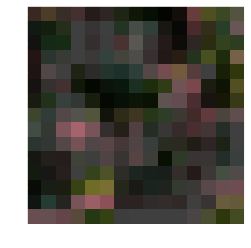

In [6]:
# generate from untrained generator (should get noises)
noise = tf.random.normal([1,LATENT_SIZE])
image = generator.model(noise, training=False)
plt.imshow(image[0])
print(discriminator.model(image, training=False).numpy())

## **Training**

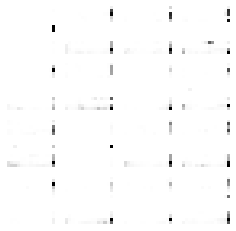

Saving checkpoint for epoch 48 at .\training_checkpoints\current\ckpt-48
Time for epoch 48 is 1.8688583374023438 sec


KeyboardInterrupt: 

In [7]:
EPOCHS = 200

if isColab():                   # some colab's tpu side bug
  import numpy as np
  np.rank = np.ndim
train(generator, discriminator, training_dataset, EPOCHS, BATCH_SIZE, strategy)

## **Testing**

In [ ]:
noise = tf.random.normal([1,LATENT_SIZE])
image = generator.model(noise, training=False)
plt.imshow(image[0])
print(discriminator.model(image, training=False).numpy())

## **Experiments**
Just a playground for trying out codes, nothing related at all, do not execute

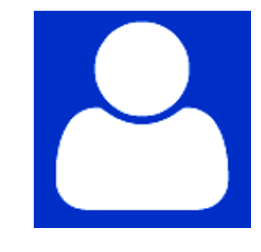

In [143]:
### just code testing

import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt 
import os
from PIL import Image
%matplotlib inline

fbytes = tf.io.read_file('avatar.png')
image = tf.image.decode_png(fbytes, channels=4)
max_resize = 0.5
random_scale = max_resize + np.random.rand()*(1 - max_resize)
image = tf.image.central_crop(image, random_scale)
image = Image.fromarray(image.numpy())
image = image.resize((206, 206))
image = tf.convert_to_tensor(np.array(image))
plt.imshow(image)

0.8249300690690824